### Q1

In [1]:
%%bash

pip install pandas matplotlib scikit-learn pyarrow wandb
wandb --version

wandb, version 0.15.3


### Q2

In [1]:
import ruamel.yaml as YAML

with open("config.yaml") as f:
    DEFAULT_PARAMS = YAML.load(f)
DEFAULT_PARAMS

/tmp/ipykernel_960490/3617935310.py:4: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  DEFAULT_PARAMS = YAML.load(f)


{'project_name': 'mlops-zoomcamp-hw2',
 'data_folder': 'data',
 'output_folder': 'output',
 'entity': 'ayeffkay',
 'dict_vectorizer_name': 'dv.pkl',
 'artifact_name': 'NYC-Taxi',
 'train_artifact_name': 'NYC-Taxi-train',
 'model_file': 'regressor.pkl'}

In [2]:
DF = DEFAULT_PARAMS['data_folder']
PN = DEFAULT_PARAMS['project_name']
ENT = DEFAULT_PARAMS['entity']
OUT = DEFAULT_PARAMS['output_folder']
AN = DEFAULT_PARAMS['artifact_name']
TAN = DEFAULT_PARAMS['train_artifact_name']
DV = DEFAULT_PARAMS['dict_vectorizer_name']

In [3]:
%%bash -s "$DF" "$PN" "$ENT" "$OUT"

wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-01.parquet -P $1
wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-02.parquet -P $1
wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-03.parquet -P $1

python preprocess_data.py \
  --wandb_project $2 \
  --wandb_entity $3 \
  --raw_data_path $1 \
  --dest_path $4

--2023-06-04 23:09:15--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 65.9.50.8, 65.9.50.89, 65.9.50.44, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|65.9.50.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1254291 (1.2M) [binary/octet-stream]
Saving to: ‘data/green_tripdata_2022-01.parquet.2’

     0K .......... .......... .......... .......... ..........  4% 1.53M 1s
    50K .......... .......... .......... .......... ..........  8% 2.12M 1s
   100K .......... .......... .......... .......... .......... 12% 3.50M 0s
   150K .......... .......... .......... .......... .......... 16% 8.62M 0s
   200K .......... .......... .......... .......... .......... 20% 4.74M 0s
   250K .......... .......... .......... .......... .......... 24% 7.01M 0s
   300K .......... .......... .......... .......... .......... 28% 4.21M 0s
 

In [4]:
import os
import wandb

with wandb.init(project=PN, entity=ENT) as run:
    artifact = run.use_artifact(f'{ENT}/{PN}/{AN}:v0', type='preprocessed_dataset')
    dv_path = artifact.get_path(DV).download()
    print(f'DictVectorizer size is {os.stat(dv_path).st_size / 1024} KBytes')

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: ayeffkay. Use `wandb login --relogin` to force relogin


DictVectorizer size is 150.05859375 KBytes


### Q3

In [5]:
%%bash -s "$PN" "$ENT" "$AN"

python train.py \
  --wandb_project $1 \
  --wandb_entity $2 \
  --data_artifact "$2/$1/$3:v0"

/home/alina/mlops-zoomcamp/cohorts/2023/02-experiment-tracking/homework-wandb/preprocess_data.py:12: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  DEFAULT_PARAMS = YAML.load(f)
wandb: Currently logged in as: ayeffkay. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.15.3
wandb: Run data is saved locally in /home/alina/mlops-zoomcamp/cohorts/2023/02-experiment-tracking/homework-wandb/wandb/run-20230604_231015-aauflazl
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run faithful-sun-6
wandb: ⭐️ View project at https://wandb.ai/ayeffkay/mlops-zoomcamp-hw2
wandb: 🚀 View run at https://wandb.ai/ayeffkay/ml

In [6]:
import wandb
api = wandb.Api()
run = api.run("mlops-zoomcamp-hw2/runs/aauflazl")
run.config


{'max_depth': 10, 'random_state': 0}

### Q4

See results here: https://api.wandb.ai/links/ayeffkay/ejokj6gc

In [8]:
%%bash -s "$PN" "$ENT" "$AN"

python sweep.py \
  --wandb_project $1 \
  --wandb_entity $2 \
  --data_artifact "$2/$1/$3:v0"

/home/alina/mlops-zoomcamp/cohorts/2023/02-experiment-tracking/homework-wandb/preprocess_data.py:12: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  DEFAULT_PARAMS = YAML.load(f)


Create sweep with ID: 70fma9ud
Sweep URL: https://wandb.ai/ayeffkay/mlops-zoomcamp-hw2/sweeps/70fma9ud


wandb: Agent Starting Run: 3ugdlpwo with config:
wandb: 	max_depth: 7
wandb: 	min_samples_leaf: 2
wandb: 	min_samples_split: 3
wandb: 	n_estimators: 41
wandb: Currently logged in as: ayeffkay. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.15.3
wandb: Run data is saved locally in /home/alina/mlops-zoomcamp/cohorts/2023/02-experiment-tracking/homework-wandb/wandb/run-20230604_231304-3ugdlpwo
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run solar-sweep-1
wandb: ⭐️ View project at https://wandb.ai/ayeffkay/mlops-zoomcamp-hw2
wandb: 🧹 View sweep at https://wandb.ai/ayeffkay/mlops-zoomcamp-hw2/sweeps/70fma9ud
wandb: 🚀 View run at https://wandb.ai/ayeffkay/mlops-zoomcamp-hw2/runs/3ugdlpwo
wandb:   4 of 4 files downloaded.  
wandb: Waiting for W&B process to finish... (success).
wandb: 
wandb: Run history:
wandb: MSE ▁
wandb: 
wandb: Run summary:
wandb: MSE 2.45289
wandb: 
wandb: 🚀 View run solar-sweep-1 at: https://wandb.ai/ayeffkay/ml

### Q5

In [28]:
import wandb
api = wandb.Api()
best_run = next(iter(api.runs(path=f"{ENT}/{PN}", order="+summary_metrics.MSE", filters={"display_name": {"$regex": ".*-sweep-.*"}})))
best_model_artifact = [artifact for artifact in best_run.logged_artifacts() if 'model' in artifact.full_name][0]
best_model_artifact.link(f"{ENT}/{PN}/production")

True

In [31]:
production_artifact = api.artifact(f"{ENT}/{PN}/production:v0")

In [46]:
production_artifact.metadata, production_artifact.source_version, production_artifact.aliases

({}, 'v0', ['latest'])

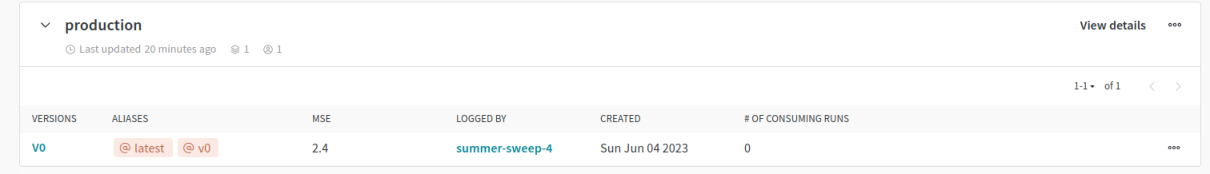

In [1]:
from wand.image import Image as WImage
img = WImage(filename='registry.pdf')
img